In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy

plt.rcParams['text.usetex'] = True

In [3]:
from tqdm import tqdm

In [4]:
def FHNPeriodic(t, y, parms):
    N = parms['N']
    u = y[:N]
    v = y[N:]
    dudt = np.zeros(N)
    dvdt = np.zeros(N)
    for i in range(parms['N']):
        vleft = v[i-1] if i>0 else v[-1]
        vright = v[i+1] if i<(N-1) else v[0]

        dudt[i] = u[i]*(1 - u[i])*(u[i] - parms['a']) - v[i]
        dvdt[i] = parms['e']*(parms['k']*u[i] - v[i] - parms['b']) + parms['D']*(vleft + vright - 2*v[i])
    return np.concatenate([dudt, dvdt])

def FHNString(t, y, parms):#on a string
    N = parms['N']
    u = y[:N]
    v = y[N:]
    dudt = np.zeros(N)
    dvdt = np.zeros(N)
    for i in range(N):
        dudt[i] = u[i] * (1 - u[i]) * (u[i] - parms['a']) - v[i]
        if i > 0 and i < N - 1:
            dvdt[i] = parms['e'] * (parms['k'] * u[i] - v[i] - parms['b']) + parms['D'] * (v[i-1] + v[i+1] - 2 * v[i])
        elif i == 0:
            dvdt[i] = parms['D'] * (v[1] - v[i])  
        elif i == N - 1:
            dvdt[i] = parms['D'] * (v[i-1] - v[i])  
    return np.concatenate([dudt, dvdt])

In [5]:
aps_params = {
    'N' : 10,
    'a' : .139, 
    'e' : .001,
    'k' : .6,
    'b' : 7,
    'D' : .4e3
}

spod_params = {
    'N' : 10,
    'a' : .139, 
    'e' : .001,
    'k' : .6,
    'b' : 16,
    'D' : 2e3
}

so_params = {
    'N' : 10,
    'a' : .139, 
    'e' : .001,
    'k' : .6,
    'b' : 6,
    'D' : 1e3
}

test_param={}
test_param1={}

In [6]:
# y0 = np.ones(2*params['N'])
params = so_params
tspan = (0, 4e-4)
t_eval =  np.linspace(0,4e-4, 100)
y0 = np.random.uniform(0.1, 0.9, 2*params['N'])  # Avoiding extremes

sol = spy.integrate.solve_ivp(lambda t, y: FHNString(t, y, params), 
                tspan, y0, t_eval=t_eval,
                method='RK45')


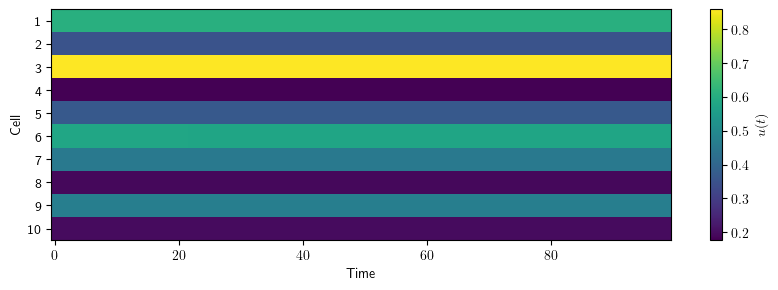

In [7]:
plt.figure(figsize=(10, 3))
plt.imshow(sol.y[:params['N'], :], aspect='auto', cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('$u(t)$')
plt.xlabel('Time')
plt.ylabel('Cell')
plt.yticks(ticks=np.arange(params['N']), labels=np.arange(1, params['N']+1))
plt.show()

## Observations
- for such long time units like `t_span = (0, 1e2)` the system diverges away from the shown examples(SPOD)